In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from dateutil import relativedelta
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
print(sns.__version__)

0.9.0


In [3]:
import numpy as np
from catboost import CatBoostRegressor, FeaturesData, Pool
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [4]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from numba import jit

In [69]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [70]:
train.shape

(341424, 24)

In [71]:
test.shape

(146765, 23)

In [72]:
train.head(5)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(train)

Number of variables,24
Number of observations,341424
Total Missing (%),0.1%
Total size in memory,62.5 MiB
Average record size in memory,192.0 B
Numeric,14
Categorical,8
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [9]:
test.head(5)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [36]:
train.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [37]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'stay_time', 'checkin_weekday',
       'checkout_weekday', 'checkin_month', 'checkout_month'],
      dtype='object')

In [40]:
train['log_roomnights'] = np.log(1+ train['roomnights'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [35]:
train[cat_vars].nunique()

channel_code                 3
main_product_code            5
numberofadults              28
numberofchildren            12
persontravellingid           6
resort_region_code           3
resort_type_code             7
room_type_booked_code        6
state_code_resort           11
total_pax                   18
member_age_buckets          10
booking_type_code            2
cluster_code                 6
reservationstatusid_code     4
resort_id                   32
checkin_weekday              7
checkout_weekday             7
dtype: int64

In [47]:
#train['memberid'].isnull().sum()
train['reservation_id'].isnull().sum()

0

In [17]:
train.head(5)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [73]:
def stay_calculation(txt1, txt2):
    """Days of stay calculator from check in and check out date"""
    stay = (datetime.strptime(txt1, "%d/%m/%y")-datetime.strptime(txt2, "%d/%m/%y")).days
    checkin_weekday = (datetime.strptime(txt2, "%d/%m/%y")).weekday()
    checkout_weekday = (datetime.strptime(txt1, "%d/%m/%y")).weekday()
    checkin_month = (datetime.strptime(txt2, "%d/%m/%y")).month
    checkout_month = (datetime.strptime(txt1, "%d/%m/%y")).month
    #return pd.Series(stay), pd.Series(checkin_weekday), pd.Series(checkout_weekday)
    return pd.Series([stay, checkin_weekday, checkout_weekday,checkin_month,checkout_month])

train[['stay_time','checkin_weekday','checkout_weekday', 'checkin_month','checkout_month']] = train.apply(lambda x: stay_calculation(x['checkout_date'], x['checkin_date']),axis=1)
test[['stay_time','checkin_weekday','checkout_weekday','checkin_month','checkout_month']]  = test.apply(lambda x: stay_calculation(x['checkout_date'], x['checkin_date']),axis=1)
 
#train.apply(lambda x: stay_calculation(x['checkout_date'], x['checkin_date']),axis=1)                        

In [ ]:
df = pd.concat([train, test], axis=0)

In [ ]:
df['totalMembers_diff_AdultPlusChild'] = (df['numberofadults'] + df['numberofchildren'])-df['total_pax']

numberOfTimeAMemeberVisited = df.groupby(['memberid']).size().reset_index(name='numberOfTimeAMemeberVisited')
df = pd.merge(df, numberOfTimeAMemeberVisited, how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['checkin_date_checkout_date_diff'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['roomnights'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['total_pax'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['numberofadults'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['roomnights'].agg('sum')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime_Sum"], how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['totalMembers_diff_AdultPlusChild'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['memberid'])

groupByMemberId = df.groupby(['memberid'])['booking_date_checkin_diff'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['memberid'])


groupByMemberId = df.groupby(['resort_id'])['numberOfTimeAMemeberVisited'].agg('mean')
df = pd.merge(df, groupByMemberId.reset_index(), suffixes=["", "_OfAllTime"], how='left', on=['resort_id'])


df = df.drop(['reservation_id','booking_date','checkin_date','checkout_date','memberid'],axis=1)


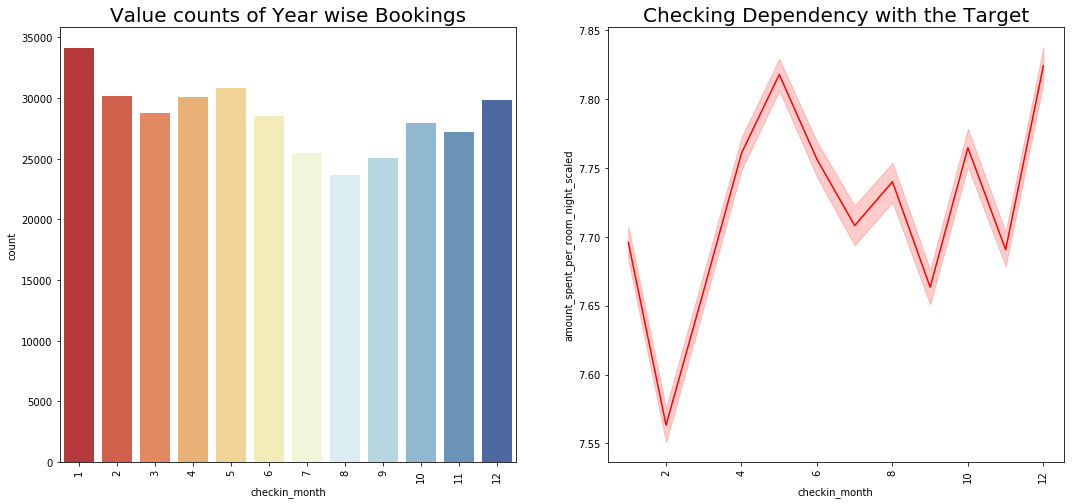

In [20]:
# analysis of booking year
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#import seaborn as sns
#import matplotlib.pyplot as plt

# counting the values of types of reservation status
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(train['checkin_month'], palette = 'RdYlBu')
plt.title('Value counts of Year wise Bookings', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(df['checkin_month'], df['amount_spent_per_room_night_scaled'], color = 'red')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [49]:
cat_vars = ['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
        'member_age_buckets', 'booking_type_code',
       'cluster_code', 'reservationstatusid_code', 'resort_id','checkin_weekday','checkout_weekday',
            'checkin_month','checkout_month'
           ]
#'total_pax'
cont_vars = ['log_roomnights','stay_time','total_pax']

#'reservation_id', 'booking_date', 'checkin_date', 'checkout_date','memberid'

target_var = ['amount_spent_per_room_night_scaled']

In [62]:
df['season_holidayed_code'] = df['season_holidayed_code'].fillna(0)
#'state_code_residence'

In [56]:
df['state_code_residence'] = df['state_code_residence'].fillna(0)

In [63]:
drop_cols = ['reservation_id','booking_date','checkin_date',
             'checkout_date']
#'season_holidayed_code', 'state_code_residence']

train_new = df.iloc[:341424, :]
test_new = df.iloc[341424:, :]
#train_new = train.drop(drop_cols, axis=1)
#test_new = test.drop(drop_cols, axis=1)

In [64]:
X,y = train_new.drop('amount_spent_per_room_night_scaled' ,axis=1), train_new['amount_spent_per_room_night_scaled']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score


X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)


In [65]:
#'stay_time'
categorical_features_indices = []
cont_vars = ['log_roomnights','stay_time','total_pax']
for i,col in enumerate(X.columns):
    if col not in cont_vars:
        categorical_features_indices.append(i)

In [66]:
X_train[cat_vars].isnull().sum()

channel_code                0
main_product_code           0
numberofadults              0
numberofchildren            0
persontravellingid          0
resort_region_code          0
resort_type_code            0
room_type_booked_code       0
season_holidayed_code       0
state_code_residence        0
state_code_resort           0
member_age_buckets          0
booking_type_code           0
cluster_code                0
reservationstatusid_code    0
resort_id                   0
checkin_weekday             0
checkout_weekday            0
checkin_month               0
checkout_month              0
dtype: int64

In [67]:
import time
notebookstart= time.time()

modelstart= time.time()
cb_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.01,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train,
             eval_set=(X_val,y_val),
             cat_features=categorical_features_indices,
             use_best_model=True,
             verbose=75)

0:	learn: 7.7209633	test: 7.7209112	best: 7.7209112 (0)	total: 3.54s	remaining: 58m 56s
75:	learn: 3.7565926	test: 3.7553802	best: 3.7553802 (75)	total: 2m 29s	remaining: 30m 22s
150:	learn: 1.9947848	test: 1.9921911	best: 1.9921911 (150)	total: 5m 48s	remaining: 32m 37s
225:	learn: 1.2998115	test: 1.2969776	best: 1.2969776 (225)	total: 10m 31s	remaining: 36m 3s
300:	learn: 1.0743581	test: 1.0733344	best: 1.0733344 (300)	total: 15m 53s	remaining: 36m 55s
375:	learn: 1.0058445	test: 1.0044122	best: 1.0044122 (375)	total: 21m 43s	remaining: 36m 3s
450:	learn: 0.9783808	test: 0.9735537	best: 0.9735537 (450)	total: 27m 12s	remaining: 33m 7s
525:	learn: 0.9679849	test: 0.9633123	best: 0.9633123 (525)	total: 32m 37s	remaining: 29m 23s
600:	learn: 0.9578599	test: 0.9584187	best: 0.9584187 (600)	total: 39m 10s	remaining: 26m
675:	learn: 0.9516245	test: 0.9557231	best: 0.9557231 (675)	total: 46m 13s	remaining: 22m 9s
750:	learn: 0.9469885	test: 0.9543662	best: 0.9543662 (750)	total: 52m 17s	rem

Dataset is provided, but PredictionValuesChange feature importance don't use it, since non-empty LeafWeights in model.


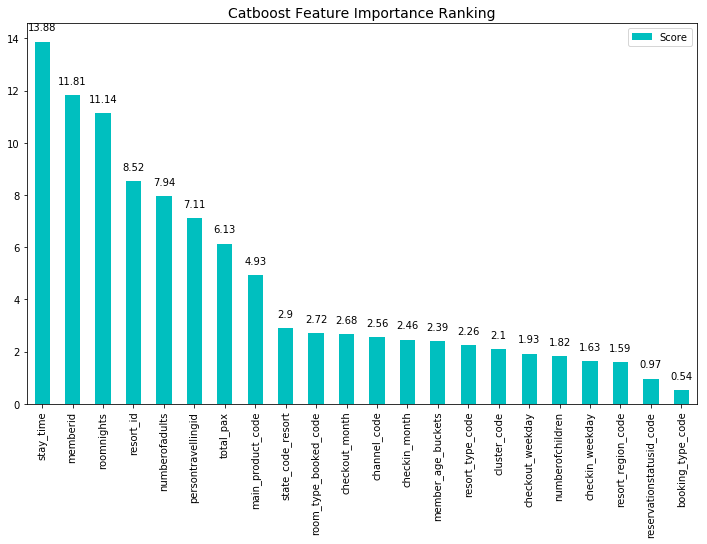

In [31]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, cb_model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [130]:
# Set up folds

MAX_ROUNDS = 650
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.05

y_valid_pred = 0*y
#X_test = test_df.drop(['id'], axis=1)
y_test_pred = 0

K = 3
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
# Set up classifier
model =CatBoostRegressor(iterations=700,
                             learning_rate=0.01,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             #metric_period = 75,
                             od_wait=100)
# Run CV

for i, (train_index, test_index) in enumerate(kf.split(X)):
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", i)
    
    # Run model for this fold
    if OPTIMIZE_ROUNDS:
        fit_model = model.fit(X_train, y_train, 
                               eval_set=[X_valid, y_valid],
                              cat_features=categorical_features_indices,
                               use_best_model=True,
                              verbose = True
                             )
        print( "  N trees = ", model.tree_count_ )
    else:
        fit_model = model.fit(X_train, y_train, cat_features=categorical_features_indices)
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    
    #print( "  Gini = ", eval_gini(y_valid, pred) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict(test_new)
    
y_test_pred /= K  # Average test set predictions

#print( "\nGini for full training set:" )
#eval_gini(y, y_valid_pred)


Fold  0
0:	learn: 7.7204399	total: 150ms	remaining: 1m 44s
1:	learn: 7.6447823	total: 1.41s	remaining: 8m 13s
2:	learn: 7.5698988	total: 1.61s	remaining: 6m 14s
3:	learn: 7.4957366	total: 2.38s	remaining: 6m 53s
4:	learn: 7.4223384	total: 2.82s	remaining: 6m 31s
5:	learn: 7.3497249	total: 4.42s	remaining: 8m 31s
6:	learn: 7.2778111	total: 5.26s	remaining: 8m 40s
7:	learn: 7.2066785	total: 6.83s	remaining: 9m 50s
8:	learn: 7.1362671	total: 7.17s	remaining: 9m 10s
9:	learn: 7.0665740	total: 7.34s	remaining: 8m 26s
10:	learn: 6.9975941	total: 7.39s	remaining: 7m 43s
11:	learn: 6.9292941	total: 7.89s	remaining: 7m 32s
12:	learn: 6.8617127	total: 8.99s	remaining: 7m 55s
13:	learn: 6.7948416	total: 10.9s	remaining: 8m 53s
14:	learn: 6.7286445	total: 11.1s	remaining: 8m 25s
15:	learn: 6.6631273	total: 11.2s	remaining: 8m
16:	learn: 6.5982751	total: 12.2s	remaining: 8m 9s
17:	learn: 6.5340746	total: 12.6s	remaining: 7m 57s
18:	learn: 6.4705444	total: 13.4s	remaining: 7m 59s
19:	learn: 6.40767

156:	learn: 1.9141705	total: 2m 10s	remaining: 7m 29s
157:	learn: 1.9007698	total: 2m 10s	remaining: 7m 27s
158:	learn: 1.8876560	total: 2m 10s	remaining: 7m 24s
159:	learn: 1.8743873	total: 2m 11s	remaining: 7m 24s
160:	learn: 1.8616376	total: 2m 11s	remaining: 7m 21s
161:	learn: 1.8490563	total: 2m 11s	remaining: 7m 18s
162:	learn: 1.8362071	total: 2m 13s	remaining: 7m 20s
163:	learn: 1.8239046	total: 2m 13s	remaining: 7m 17s
164:	learn: 1.8114767	total: 2m 15s	remaining: 7m 19s
165:	learn: 1.7995462	total: 2m 15s	remaining: 7m 16s
166:	learn: 1.7877758	total: 2m 15s	remaining: 7m 13s
167:	learn: 1.7759505	total: 2m 17s	remaining: 7m 16s
168:	learn: 1.7644886	total: 2m 18s	remaining: 7m 14s
169:	learn: 1.7527375	total: 2m 19s	remaining: 7m 16s
170:	learn: 1.7411675	total: 2m 21s	remaining: 7m 18s
171:	learn: 1.7299684	total: 2m 23s	remaining: 7m 20s
172:	learn: 1.7189659	total: 2m 25s	remaining: 7m 21s
173:	learn: 1.7081263	total: 2m 25s	remaining: 7m 20s
174:	learn: 1.6973160	total:

309:	learn: 1.0743903	total: 5m 46s	remaining: 7m 16s
310:	learn: 1.0731973	total: 5m 50s	remaining: 7m 18s
311:	learn: 1.0721236	total: 5m 50s	remaining: 7m 15s
312:	learn: 1.0709411	total: 5m 53s	remaining: 7m 16s
313:	learn: 1.0697725	total: 5m 56s	remaining: 7m 17s
314:	learn: 1.0686736	total: 5m 58s	remaining: 7m 17s
315:	learn: 1.0673423	total: 5m 59s	remaining: 7m 17s
316:	learn: 1.0662906	total: 6m 1s	remaining: 7m 16s
317:	learn: 1.0652174	total: 6m 3s	remaining: 7m 16s
318:	learn: 1.0642774	total: 6m 3s	remaining: 7m 13s
319:	learn: 1.0632392	total: 6m 5s	remaining: 7m 14s
320:	learn: 1.0620949	total: 6m 8s	remaining: 7m 14s
321:	learn: 1.0610963	total: 6m 11s	remaining: 7m 15s
322:	learn: 1.0600266	total: 6m 13s	remaining: 7m 16s
323:	learn: 1.0590625	total: 6m 15s	remaining: 7m 15s
324:	learn: 1.0580336	total: 6m 17s	remaining: 7m 16s
325:	learn: 1.0571113	total: 6m 20s	remaining: 7m 16s
326:	learn: 1.0562100	total: 6m 22s	remaining: 7m 16s
327:	learn: 1.0553175	total: 6m 2

462:	learn: 0.9910552	total: 10m 10s	remaining: 5m 12s
463:	learn: 0.9909316	total: 10m 12s	remaining: 5m 11s
464:	learn: 0.9908327	total: 10m 12s	remaining: 5m 9s
465:	learn: 0.9907023	total: 10m 14s	remaining: 5m 8s
466:	learn: 0.9905661	total: 10m 16s	remaining: 5m 7s
467:	learn: 0.9904707	total: 10m 16s	remaining: 5m 5s
468:	learn: 0.9903986	total: 10m 17s	remaining: 5m 3s
469:	learn: 0.9902613	total: 10m 18s	remaining: 5m 2s
470:	learn: 0.9901441	total: 10m 20s	remaining: 5m 1s
471:	learn: 0.9900170	total: 10m 21s	remaining: 5m
472:	learn: 0.9899489	total: 10m 21s	remaining: 4m 58s
473:	learn: 0.9898363	total: 10m 23s	remaining: 4m 57s
474:	learn: 0.9896048	total: 10m 25s	remaining: 4m 56s
475:	learn: 0.9894915	total: 10m 26s	remaining: 4m 54s
476:	learn: 0.9893232	total: 10m 28s	remaining: 4m 53s
477:	learn: 0.9892185	total: 10m 29s	remaining: 4m 52s
478:	learn: 0.9891087	total: 10m 31s	remaining: 4m 51s
479:	learn: 0.9890047	total: 10m 32s	remaining: 4m 50s
480:	learn: 0.9889393

613:	learn: 0.9741268	total: 15m 43s	remaining: 2m 12s
614:	learn: 0.9740578	total: 15m 45s	remaining: 2m 10s
615:	learn: 0.9739554	total: 15m 47s	remaining: 2m 9s
616:	learn: 0.9739271	total: 15m 49s	remaining: 2m 7s
617:	learn: 0.9738109	total: 15m 52s	remaining: 2m 6s
618:	learn: 0.9736874	total: 15m 54s	remaining: 2m 4s
619:	learn: 0.9736119	total: 15m 56s	remaining: 2m 3s
620:	learn: 0.9735625	total: 15m 58s	remaining: 2m 1s
621:	learn: 0.9734774	total: 16m 1s	remaining: 2m
622:	learn: 0.9734384	total: 16m 3s	remaining: 1m 59s
623:	learn: 0.9734103	total: 16m 6s	remaining: 1m 57s
624:	learn: 0.9733652	total: 16m 7s	remaining: 1m 56s
625:	learn: 0.9733007	total: 16m 10s	remaining: 1m 54s
626:	learn: 0.9732420	total: 16m 13s	remaining: 1m 53s
627:	learn: 0.9731896	total: 16m 15s	remaining: 1m 51s
628:	learn: 0.9731063	total: 16m 17s	remaining: 1m 50s
629:	learn: 0.9730521	total: 16m 19s	remaining: 1m 48s
630:	learn: 0.9729537	total: 16m 21s	remaining: 1m 47s
631:	learn: 0.9729162	to

68:	learn: 4.0073647	total: 1m 6s	remaining: 10m 5s
69:	learn: 3.9701766	total: 1m 7s	remaining: 10m 4s
70:	learn: 3.9333636	total: 1m 9s	remaining: 10m 15s
71:	learn: 3.8970191	total: 1m 9s	remaining: 10m 8s
72:	learn: 3.8610645	total: 1m 9s	remaining: 10m
73:	learn: 3.8254290	total: 1m 10s	remaining: 9m 53s
74:	learn: 3.7901746	total: 1m 12s	remaining: 10m 1s
75:	learn: 3.7553224	total: 1m 15s	remaining: 10m 16s
76:	learn: 3.7208711	total: 1m 15s	remaining: 10m 12s
77:	learn: 3.6867552	total: 1m 18s	remaining: 10m 29s
78:	learn: 3.6530331	total: 1m 21s	remaining: 10m 41s
79:	learn: 3.6197074	total: 1m 22s	remaining: 10m 35s
80:	learn: 3.5866719	total: 1m 23s	remaining: 10m 41s
81:	learn: 3.5540704	total: 1m 24s	remaining: 10m 35s
82:	learn: 3.5217315	total: 1m 26s	remaining: 10m 42s
83:	learn: 3.4897854	total: 1m 27s	remaining: 10m 39s
84:	learn: 3.4581725	total: 1m 29s	remaining: 10m 45s
85:	learn: 3.4269205	total: 1m 31s	remaining: 10m 51s
86:	learn: 3.3959918	total: 1m 33s	remaini

221:	learn: 1.3309648	total: 4m 11s	remaining: 9m 2s
222:	learn: 1.3257009	total: 4m 12s	remaining: 9m
223:	learn: 1.3204628	total: 4m 14s	remaining: 9m
224:	learn: 1.3152911	total: 4m 16s	remaining: 9m 2s
225:	learn: 1.3102265	total: 4m 18s	remaining: 9m 1s
226:	learn: 1.3053091	total: 4m 18s	remaining: 8m 59s
227:	learn: 1.3004078	total: 4m 20s	remaining: 9m
228:	learn: 1.2956295	total: 4m 21s	remaining: 8m 57s
229:	learn: 1.2906889	total: 4m 23s	remaining: 8m 58s
230:	learn: 1.2857837	total: 4m 25s	remaining: 8m 58s
231:	learn: 1.2811711	total: 4m 27s	remaining: 8m 59s
232:	learn: 1.2764021	total: 4m 29s	remaining: 8m 59s
233:	learn: 1.2719642	total: 4m 31s	remaining: 9m
234:	learn: 1.2675749	total: 4m 32s	remaining: 8m 59s
235:	learn: 1.2633385	total: 4m 32s	remaining: 8m 56s
236:	learn: 1.2592328	total: 4m 32s	remaining: 8m 53s
237:	learn: 1.2550665	total: 4m 34s	remaining: 8m 53s
238:	learn: 1.2507814	total: 4m 36s	remaining: 8m 53s
239:	learn: 1.2467253	total: 4m 38s	remaining: 

374:	learn: 1.0243211	total: 8m 17s	remaining: 7m 10s
375:	learn: 1.0235962	total: 8m 18s	remaining: 7m 9s
376:	learn: 1.0230387	total: 8m 19s	remaining: 7m 8s
377:	learn: 1.0222483	total: 8m 21s	remaining: 7m 7s
378:	learn: 1.0217366	total: 8m 22s	remaining: 7m 5s
379:	learn: 1.0209880	total: 8m 24s	remaining: 7m 4s
380:	learn: 1.0204645	total: 8m 25s	remaining: 7m 3s
381:	learn: 1.0196952	total: 8m 28s	remaining: 7m 3s
382:	learn: 1.0192215	total: 8m 29s	remaining: 7m 1s
383:	learn: 1.0187531	total: 8m 30s	remaining: 7m
384:	learn: 1.0183219	total: 8m 30s	remaining: 6m 57s
385:	learn: 1.0177372	total: 8m 33s	remaining: 6m 57s
386:	learn: 1.0172975	total: 8m 33s	remaining: 6m 55s
387:	learn: 1.0168779	total: 8m 34s	remaining: 6m 53s
388:	learn: 1.0164197	total: 8m 35s	remaining: 6m 52s
389:	learn: 1.0160014	total: 8m 36s	remaining: 6m 50s
390:	learn: 1.0155880	total: 8m 37s	remaining: 6m 48s
391:	learn: 1.0151543	total: 8m 38s	remaining: 6m 47s
392:	learn: 1.0147165	total: 8m 40s	rema

526:	learn: 0.9868172	total: 12m 29s	remaining: 4m 6s
527:	learn: 0.9867012	total: 12m 31s	remaining: 4m 4s
528:	learn: 0.9865745	total: 12m 33s	remaining: 4m 3s
529:	learn: 0.9864596	total: 12m 36s	remaining: 4m 2s
530:	learn: 0.9863384	total: 12m 38s	remaining: 4m 1s
531:	learn: 0.9862231	total: 12m 40s	remaining: 4m
532:	learn: 0.9861003	total: 12m 42s	remaining: 3m 58s
533:	learn: 0.9859500	total: 12m 45s	remaining: 3m 57s
534:	learn: 0.9858332	total: 12m 47s	remaining: 3m 56s
535:	learn: 0.9855999	total: 12m 49s	remaining: 3m 55s
536:	learn: 0.9854736	total: 12m 51s	remaining: 3m 54s
537:	learn: 0.9853488	total: 12m 54s	remaining: 3m 53s
538:	learn: 0.9852247	total: 12m 56s	remaining: 3m 51s
539:	learn: 0.9851174	total: 12m 58s	remaining: 3m 50s
540:	learn: 0.9849988	total: 13m	remaining: 3m 49s
541:	learn: 0.9847987	total: 13m 2s	remaining: 3m 48s
542:	learn: 0.9846971	total: 13m 5s	remaining: 3m 47s
543:	learn: 0.9846478	total: 13m 5s	remaining: 3m 45s
544:	learn: 0.9845496	tota

677:	learn: 0.9726837	total: 17m 49s	remaining: 34.7s
678:	learn: 0.9725637	total: 17m 50s	remaining: 33.1s
679:	learn: 0.9725224	total: 17m 52s	remaining: 31.5s
680:	learn: 0.9724002	total: 17m 54s	remaining: 30s
681:	learn: 0.9723451	total: 17m 56s	remaining: 28.4s
682:	learn: 0.9723008	total: 17m 58s	remaining: 26.9s
683:	learn: 0.9722655	total: 18m	remaining: 25.3s
684:	learn: 0.9721515	total: 18m 2s	remaining: 23.7s
685:	learn: 0.9720145	total: 18m 4s	remaining: 22.1s
686:	learn: 0.9718665	total: 18m 6s	remaining: 20.6s
687:	learn: 0.9718051	total: 18m 8s	remaining: 19s
688:	learn: 0.9717778	total: 18m 10s	remaining: 17.4s
689:	learn: 0.9717203	total: 18m 12s	remaining: 15.8s
690:	learn: 0.9716207	total: 18m 14s	remaining: 14.3s
691:	learn: 0.9715923	total: 18m 16s	remaining: 12.7s
692:	learn: 0.9715478	total: 18m 18s	remaining: 11.1s
693:	learn: 0.9715160	total: 18m 20s	remaining: 9.51s
694:	learn: 0.9714638	total: 18m 22s	remaining: 7.93s
695:	learn: 0.9714260	total: 18m 24s	rem

134:	learn: 2.2581382	total: 1m 46s	remaining: 7m 27s
135:	learn: 2.2402483	total: 1m 48s	remaining: 7m 31s
136:	learn: 2.2228294	total: 1m 49s	remaining: 7m 30s
137:	learn: 2.2057407	total: 1m 49s	remaining: 7m 26s
138:	learn: 2.1888213	total: 1m 50s	remaining: 7m 24s
139:	learn: 2.1719032	total: 1m 50s	remaining: 7m 23s
140:	learn: 2.1554381	total: 1m 51s	remaining: 7m 20s
141:	learn: 2.1390082	total: 1m 53s	remaining: 7m 25s
142:	learn: 2.1227825	total: 1m 55s	remaining: 7m 30s
143:	learn: 2.1068759	total: 1m 55s	remaining: 7m 26s
144:	learn: 2.0912142	total: 1m 55s	remaining: 7m 23s
145:	learn: 2.0757495	total: 1m 55s	remaining: 7m 19s
146:	learn: 2.0604799	total: 1m 55s	remaining: 7m 15s
147:	learn: 2.0452042	total: 1m 57s	remaining: 7m 18s
148:	learn: 2.0301597	total: 1m 58s	remaining: 7m 16s
149:	learn: 2.0150812	total: 2m	remaining: 7m 21s
150:	learn: 2.0003810	total: 2m 2s	remaining: 7m 24s
151:	learn: 1.9859228	total: 2m 3s	remaining: 7m 26s
152:	learn: 1.9717762	total: 2m 3s

288:	learn: 1.1101092	total: 6m 4s	remaining: 8m 38s
289:	learn: 1.1083544	total: 6m 6s	remaining: 8m 38s
290:	learn: 1.1064576	total: 6m 8s	remaining: 8m 37s
291:	learn: 1.1048297	total: 6m 9s	remaining: 8m 35s
292:	learn: 1.1028293	total: 6m 11s	remaining: 8m 35s
293:	learn: 1.1008919	total: 6m 13s	remaining: 8m 35s
294:	learn: 1.0992795	total: 6m 14s	remaining: 8m 34s
295:	learn: 1.0976776	total: 6m 16s	remaining: 8m 34s
296:	learn: 1.0959100	total: 6m 18s	remaining: 8m 33s
297:	learn: 1.0944269	total: 6m 20s	remaining: 8m 32s
298:	learn: 1.0929899	total: 6m 21s	remaining: 8m 31s
299:	learn: 1.0915787	total: 6m 21s	remaining: 8m 29s
300:	learn: 1.0901205	total: 6m 23s	remaining: 8m 28s
301:	learn: 1.0887146	total: 6m 25s	remaining: 8m 27s
302:	learn: 1.0872932	total: 6m 27s	remaining: 8m 27s
303:	learn: 1.0859506	total: 6m 29s	remaining: 8m 27s
304:	learn: 1.0842808	total: 6m 31s	remaining: 8m 26s
305:	learn: 1.0830102	total: 6m 31s	remaining: 8m 24s
306:	learn: 1.0816977	total: 6m 

442:	learn: 0.9968083	total: 10m 3s	remaining: 5m 50s
443:	learn: 0.9966240	total: 10m 5s	remaining: 5m 49s
444:	learn: 0.9962464	total: 10m 7s	remaining: 5m 47s
445:	learn: 0.9960697	total: 10m 9s	remaining: 5m 47s
446:	learn: 0.9958959	total: 10m 11s	remaining: 5m 45s
447:	learn: 0.9957303	total: 10m 13s	remaining: 5m 44s
448:	learn: 0.9955710	total: 10m 15s	remaining: 5m 44s
449:	learn: 0.9953773	total: 10m 17s	remaining: 5m 43s
450:	learn: 0.9952094	total: 10m 20s	remaining: 5m 42s
451:	learn: 0.9950638	total: 10m 22s	remaining: 5m 41s
452:	learn: 0.9948936	total: 10m 24s	remaining: 5m 40s
453:	learn: 0.9947187	total: 10m 26s	remaining: 5m 39s
454:	learn: 0.9943655	total: 10m 28s	remaining: 5m 38s
455:	learn: 0.9942541	total: 10m 29s	remaining: 5m 36s
456:	learn: 0.9941126	total: 10m 30s	remaining: 5m 35s
457:	learn: 0.9937341	total: 10m 31s	remaining: 5m 33s
458:	learn: 0.9936193	total: 10m 32s	remaining: 5m 32s
459:	learn: 0.9934714	total: 10m 34s	remaining: 5m 30s
460:	learn: 0.

593:	learn: 0.9783589	total: 14m 59s	remaining: 2m 40s
594:	learn: 0.9783050	total: 15m 1s	remaining: 2m 39s
595:	learn: 0.9782462	total: 15m 3s	remaining: 2m 37s
596:	learn: 0.9781724	total: 15m 5s	remaining: 2m 36s
597:	learn: 0.9781066	total: 15m 8s	remaining: 2m 34s
598:	learn: 0.9780348	total: 15m 10s	remaining: 2m 33s
599:	learn: 0.9778816	total: 15m 12s	remaining: 2m 32s
600:	learn: 0.9777995	total: 15m 15s	remaining: 2m 30s
601:	learn: 0.9775694	total: 15m 17s	remaining: 2m 29s
602:	learn: 0.9773764	total: 15m 20s	remaining: 2m 28s
603:	learn: 0.9772974	total: 15m 23s	remaining: 2m 26s
604:	learn: 0.9772063	total: 15m 26s	remaining: 2m 25s
605:	learn: 0.9770242	total: 15m 28s	remaining: 2m 23s
606:	learn: 0.9769571	total: 15m 30s	remaining: 2m 22s
607:	learn: 0.9768645	total: 15m 32s	remaining: 2m 21s
608:	learn: 0.9767849	total: 15m 35s	remaining: 2m 19s
609:	learn: 0.9766853	total: 15m 37s	remaining: 2m 18s
610:	learn: 0.9765349	total: 15m 40s	remaining: 2m 16s
611:	learn: 0.

In [ ]:
val = pd.DataFrame()
val['id'] = id_train
val['target'] = y_valid_pred.values

In [ ]:
sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = y_test_pred

In [32]:
sample_submission = pd.DataFrame(test['reservation_id'])

In [33]:
sample_submission['amount_spent_per_room_night_scaled'] = (cb_model.predict(test_new) + y_test_pred)/2

In [34]:
sample_submission.to_csv('/Users/kpratik84/desktop/sample_submission.csv', index=False)